In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino
## Lecture 07

## Sanntender - XGBoost

In [1]:
###------------------
### Import statements
###------------------

import os
from time import time
import numpy as np
import pandas as pd
import xgboost

import matplotlib

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import (precision_score, recall_score, accuracy_score, classification_report, roc_auc_score)

import matplotlib.pyplot as plt

In [4]:
inpDir = os.path.join('..', '..', 'input')
outDir = '../output'
subDir = 'machine_learning'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

In [5]:
train_df = pd.read_csv(os.path.join(inpDir, subDir, 'santander/train.csv'))
test_df = pd.read_csv(os.path.join(inpDir, subDir, 'santander/test.csv'))
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30
var38,76020.0,117235.809430,182664.598503,5163.75,67870.6125,106409.16,118756.2525,22034738.76


In [9]:
for col in train_df.columns:
    print (f'Col: {col} | {train_df[col].unique()}')

Col: ID | [     1      3      4 ... 151835 151836 151838]
Col: var3 | [      2     229     178       0       8       3       4      10     110
       7     177       1       6     137      17 -999999      13      14
     148       5      11      15     122      22       9      58     121
      12     127      33     125     209      72      31      51      16
     107     174     141     191     104     129      18      49      73
      94     131     219     187     114      28      89     115      53
     126      47      84     235     161     197      23      30     146
     158     138      26     120      66     216     215      90      20
      21     103     192     142      29     163     223      95      98
      38     156      97     105     150     183     184      52      54
     220      25     225      86     124      27     162      19     195
     218      24      60     108      82      36     102     175     144
     169      64     201      79      91     159     1

In [10]:
class_names = train_df['TARGET'].unique()
class_names

array([0, 1])

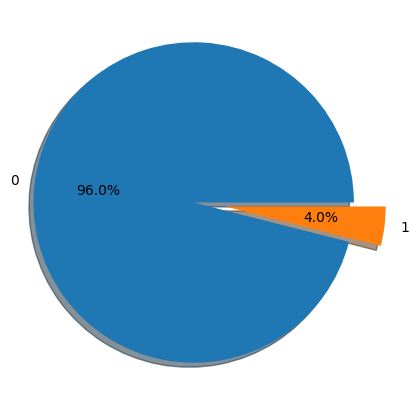

In [11]:
fig, ax = plt.subplots(figsize = (5,5))

explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. '1')

ax.pie(train_df['TARGET'].value_counts(), explode=explode, labels=class_names, autopct='%1.1f%%', shadow=True, startangle=0)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

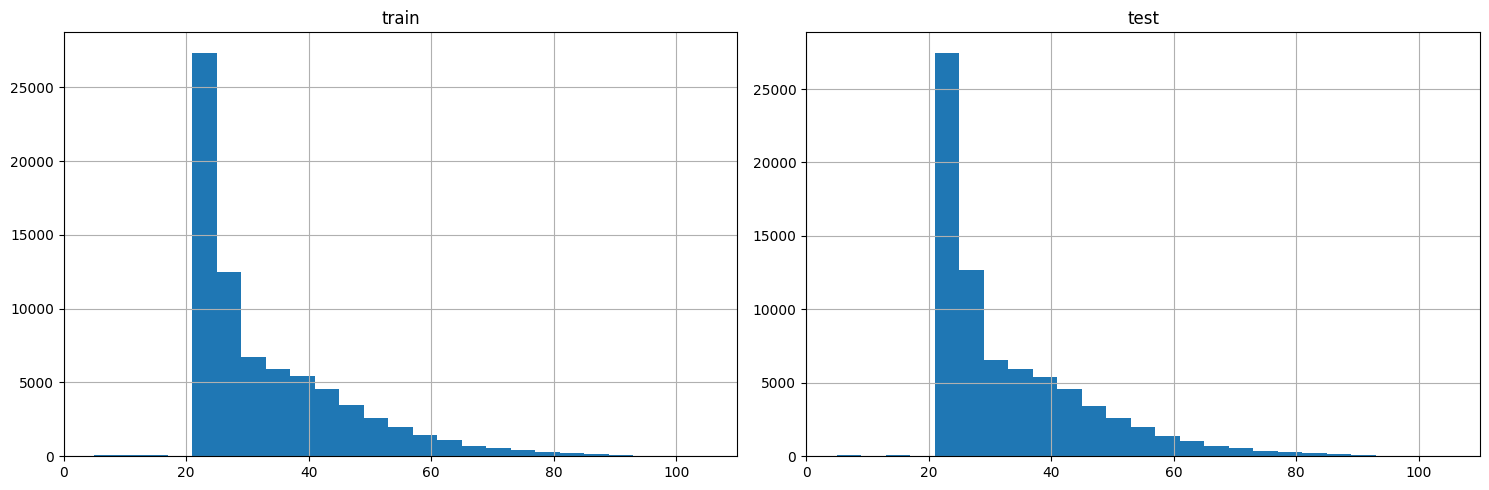

In [13]:
# var15 is AGE
fig, axes = plt.subplots(1,2, figsize = (15, 5))
ax = axes[0]
train_df['var15'].hist(bins=25, ax = ax)
ax.set_title('train');
ax = axes[1]
test_df['var15'].hist(bins=25, ax = ax)
ax.set_title('test');
plt.tight_layout()

In [14]:
# Create another column with count of zeros
train_df['n0'] = (train_df==0).sum(axis=1)

test_df['n0'] = (test_df==0).sum(axis=1)

train_df.shape, test_df.shape

((76020, 372), (75818, 371))

## Remove all columns with constant value

In [15]:
# remove constant columns (std = 0)
drop_cols = []

for col in train_df.columns:
    
    if train_df[col].std() == 0:
        
        drop_cols.append(col)

train_df.drop(drop_cols, axis=1, inplace=True)

print (train_df.shape)

(76020, 338)


In [17]:
test_df.drop(drop_cols, axis=1, inplace=True)

In [18]:
print (test_df.shape)

(75818, 337)


## Remove Duplicate Columns

In [21]:
# keep track of columns to remove
drop_cols = []
cols = train_df.columns
# loop thru cols to find equal values
for i in range(len(cols)-1):
    v = train_df[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v, train_df[cols[j]].values):
            drop_cols.append(cols[j])
print (len(drop_cols))
print (drop_cols)

29
['ind_var29_0', 'ind_var29', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var39', 'num_var29_0', 'num_var29', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'num_var37', 'num_var39', 'saldo_var29', 'saldo_medio_var13_medio_ult1', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3']


In [22]:
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(drop_cols, axis=1, inplace=True)

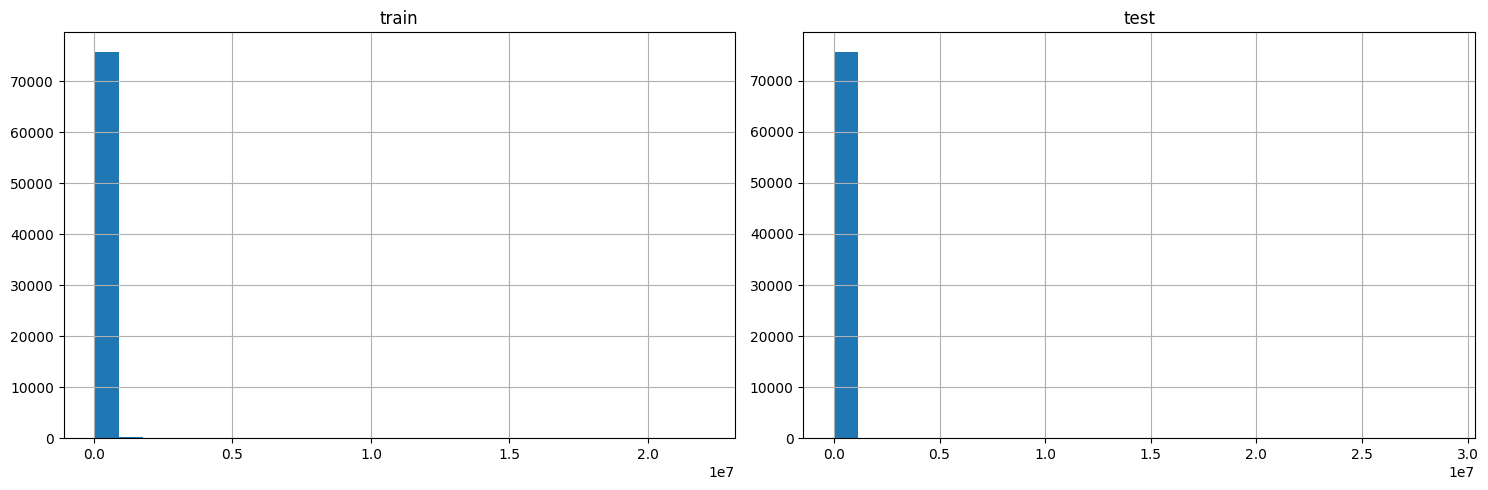

In [23]:
# var 38 is skew
fig, axes = plt.subplots(1,2, figsize = (15, 5))
ax = axes[0]
train_df['var38'].hist(bins=25, ax = ax)
ax.set_title('train');
ax = axes[1]
test_df['var38'].hist(bins=25, ax = ax)
ax.set_title('test');
plt.tight_layout()

In [24]:
train_df['var38'] = np.log(train_df['var38'])
test_df['var38'] = np.log(test_df['var38'])

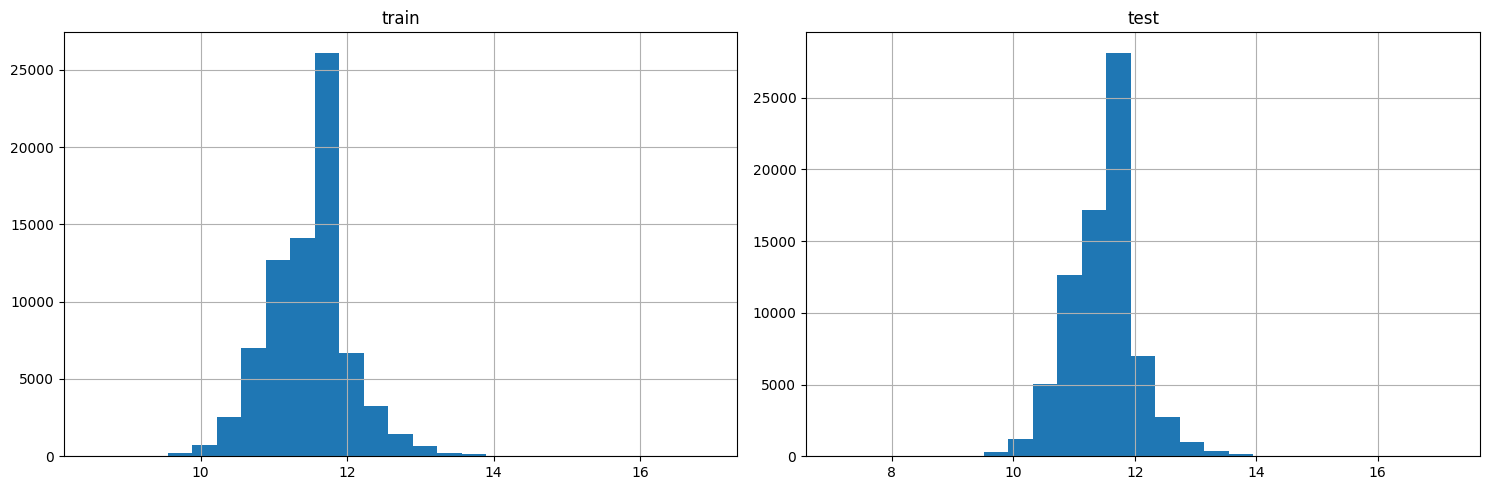

In [25]:
# var 38 is skew
fig, axes = plt.subplots(1,2, figsize = (15, 5))
ax = axes[0]
train_df['var38'].hist(bins=25, ax = ax)
ax.set_title('train');
ax = axes[1]
test_df['var38'].hist(bins=25, ax = ax)
ax.set_title('test');
plt.tight_layout()

In [26]:
fea_train_df = train_df.drop('TARGET', axis =1)
y = train_df['TARGET']

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(fea_train_df, y, test_size=TEST_SIZE,
                                                      stratify=y, random_state=RANDOM_STATE)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((60816, 308), (60816,), (15204, 308), (15204,))

In [35]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_valid = sc.transform(X_valid)

X_test = sc.transform(test_df)

In [36]:
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()

In [29]:
from xgboost.sklearn import XGBClassifier


# set the validation set for xgb training
eval_set = [(X_train,y_train), (X_valid,y_valid)]

# try using... eval_metric: mlogloss, merror, ndcg@n-, logloss, auc
clf = XGBClassifier(eval_metric='logloss', random_state = RANDOM_STATE)